# USA online sales EDA

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re 


df = pd.read_csv("sales.csv")
sales_data = pd.DataFrame(df)


/var/folders/cv/57_q_p5n4cncc53s74r1mjy80000gn/T/ipykernel_30957/3191243013.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/cv/57_q_p5n4cncc53s74r1mjy80000gn/T/ipykernel_30957/3191243013.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("sales.csv")


In [2]:
sales_data.head(10)

,order_id,order_date,status,item_id,sku,qty_ordered,price,value,discount_amount,total,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Discount_Percent
0,100354678,2020-10-01,received,574772.0,oasis_Oasis-064-36,21.0,89.9,1798.0,0.0,1798.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
1,100354678,2020-10-01,received,574774.0,Fantastic_FT-48,11.0,19.0,190.0,0.0,190.0,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
2,100354680,2020-10-01,complete,574777.0,mdeal_DMC-610-8,9.0,149.9,1199.2,0.0,1199.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
3,100354680,2020-10-01,complete,574779.0,oasis_Oasis-061-36,9.0,79.9,639.2,0.0,639.2,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
4,100367357,2020-11-13,received,595185.0,MEFNAR59C38B6CA08CD,2.0,99.9,99.9,0.0,99.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
5,100367357,2020-11-13,received,595186.0,MEFBUY59B7C3DDC2CA3-42,2.0,39.9,39.9,0.0,39.9,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
6,100367360,2020-11-13,order_refunded,595192.0,MATDAN59C3C845B38F0,2.0,47.6,47.6,0.0,47.6,...,627-31-5251,405-959-1129,Vinson,Harmon,Vinson,OK,73571,South,jwtitus,0.0
7,100354677,2020-10-01,canceled,574769.0,GFE_19_USBLEDLight,2.0,49.0,49.0,0.0,49.0,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.0
8,100354677,2020-10-01,canceled,574770.0,oasis_Kingston-32GB-DTIG4,2.0,135.0,135.0,0.0,135.0,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.0
9,100354677,2020-10-01,canceled,574771.0,Geepas_GSB5420,2.0,549.9,549.9,0.0,549.9,...,185-86-4345,239-335-6755,Graham,Bradford,Graham,FL,32042,South,lseaker,0.0


In [3]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286392 entries, 0 to 286391
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          286392 non-null  object 
 1   order_date        286392 non-null  object 
 2   status            286392 non-null  object 
 3   item_id           286392 non-null  float64
 4   sku               286392 non-null  object 
 5   qty_ordered       286392 non-null  float64
 6   price             286392 non-null  float64
 7   value             286392 non-null  float64
 8   discount_amount   286392 non-null  float64
 9   total             286392 non-null  float64
 10  category          286392 non-null  object 
 11  payment_method    286392 non-null  object 
 12  bi_st             286392 non-null  object 
 13  cust_id           286392 non-null  float64
 14  year              286392 non-null  int64  
 15  month             286392 non-null  object 
 16  ref_num           28

In [4]:
sales_data.describe()

,item_id,qty_ordered,price,value,discount_amount,total,cust_id,year,ref_num,age,Zip,Discount_Percent
count,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000,286392.000000
mean,741664.902131,3.011296,851.385253,885.879934,70.039427,815.840507,70048.019054,2020.618778,560853.663395,46.489033,49723.160015,6.069079
std,95746.031827,4.573837,1741.750751,2073.252179,256.880870,1983.580302,30243.856395,0.485688,255828.418398,16.673288,27597.198873,10.100100
min,574769.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2020.000000,111127.000000,18.000000,210.000000,0.000000
25%,659684.500000,2.000000,49.900000,49.900000,0.000000,49.900000,56519.000000,2020.000000,341265.000000,32.000000,26571.750000,0.000000
50%,742309.000000,2.000000,119.000000,158.970000,0.000000,149.800000,74225.500000,2021.000000,564857.000000,47.000000,49316.000000,0.000000
75%,826124.250000,3.000000,950.000000,910.000000,18.383050,800.000000,92357.000000,2021.000000,781086.000000,61.000000,72645.000000,11.000000
max,905208.000000,501.000000,101262.590000,101262.590000,30213.150000,101262.590000,115326.000000,2021.000000,999981.000000,75.000000,99950.000000,75.000000


In [5]:
missing_percentages = sales_data.isna().sum().sort_values(ascending = False) / len(df)
missing_percentages

order_id            0.0
order_date          0.0
Last Name           0.0
Gender              0.0
age                 0.0
full_name           0.0
E Mail              0.0
Customer Since      0.0
SSN                 0.0
Phone No.           0.0
Place Name          0.0
County              0.0
City                0.0
State               0.0
Zip                 0.0
Region              0.0
User Name           0.0
Middle Initial      0.0
First Name          0.0
Name Prefix         0.0
discount_amount     0.0
status              0.0
item_id             0.0
sku                 0.0
qty_ordered         0.0
price               0.0
value               0.0
total               0.0
ref_num             0.0
category            0.0
payment_method      0.0
bi_st               0.0
cust_id             0.0
year                0.0
month               0.0
Discount_Percent    0.0
dtype: float64

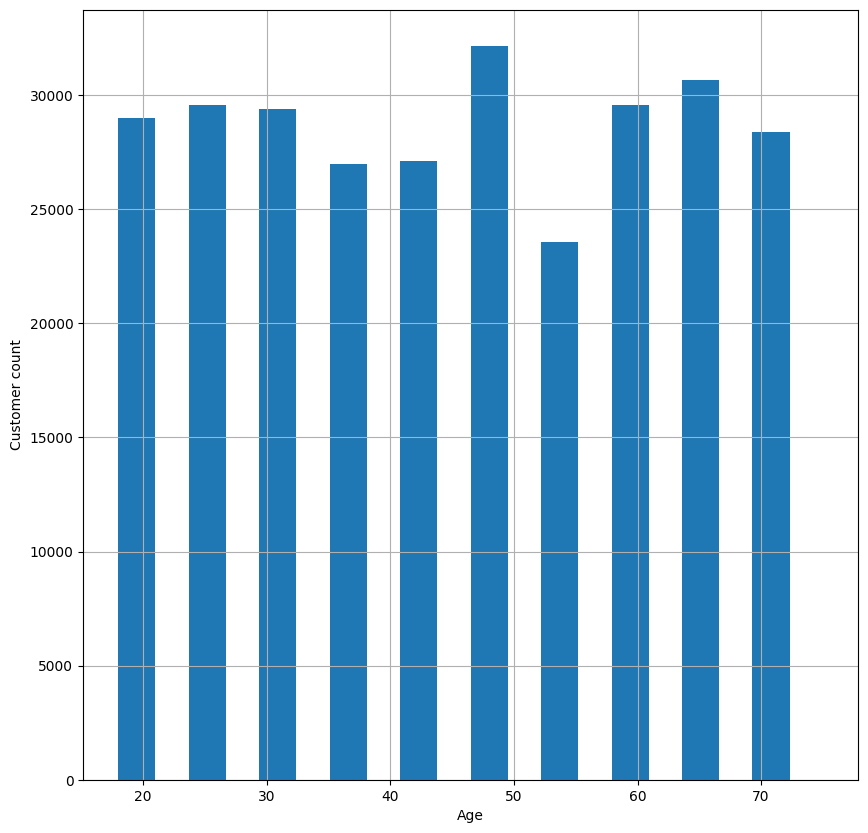

In [6]:
plt.figure(figsize=(10, 10))
plt.xlabel('Age')
plt.ylabel('Customer count')
sales_data['age'].hist(width=3)
plt.show()

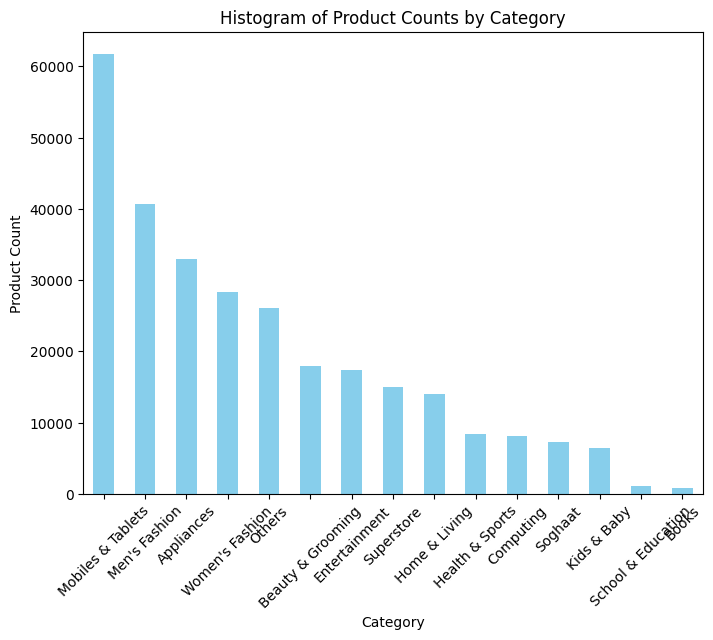

In [7]:
category_counts = sales_data['category'].value_counts()
category_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))

plt.xlabel('Category')
plt.ylabel('Product Count')
plt.title('Histogram of Product Counts by Category')
plt.xticks(ticks=range(len(category_counts.index)), labels=category_counts.index, rotation=45, ha='center')
plt.show()


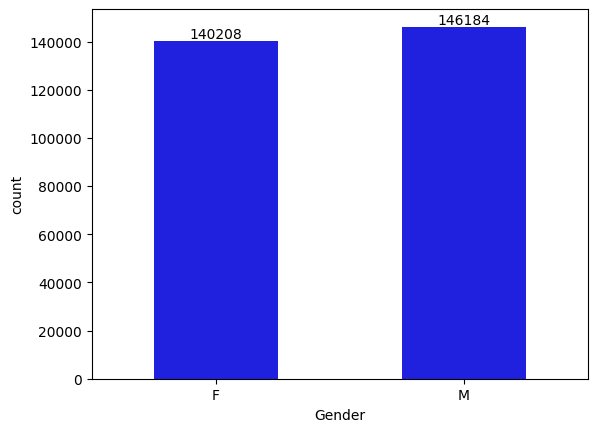

In [8]:
ax = sns.countplot(x = 'Gender',data = sales_data ,color= 'b' , width=.5)
for bars in ax.containers:
    ax.bar_label(bars)

In [9]:
age_intervals = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 75)]  # Add more intervals as needed

def map_age_to_group(age):
    for i, (start, end) in enumerate(age_intervals):
        if start <= age < end:
            return f'{start}-{end} years'

sales_data['age_group'] = sales_data['age'].apply(map_age_to_group)



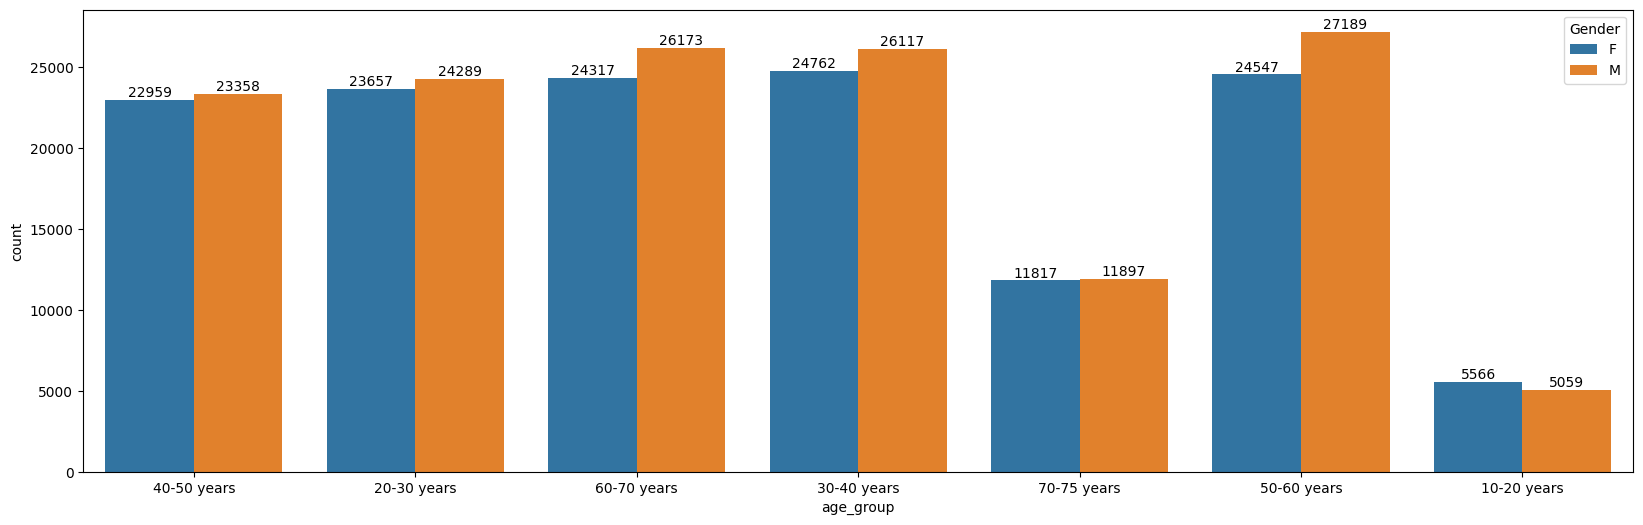

In [10]:
plt.figure(figsize=(20, 6))
ax = sns.countplot(data = sales_data, x = 'age_group', hue = 'Gender')
for bars in ax.containers:
    ax.bar_label(bars)

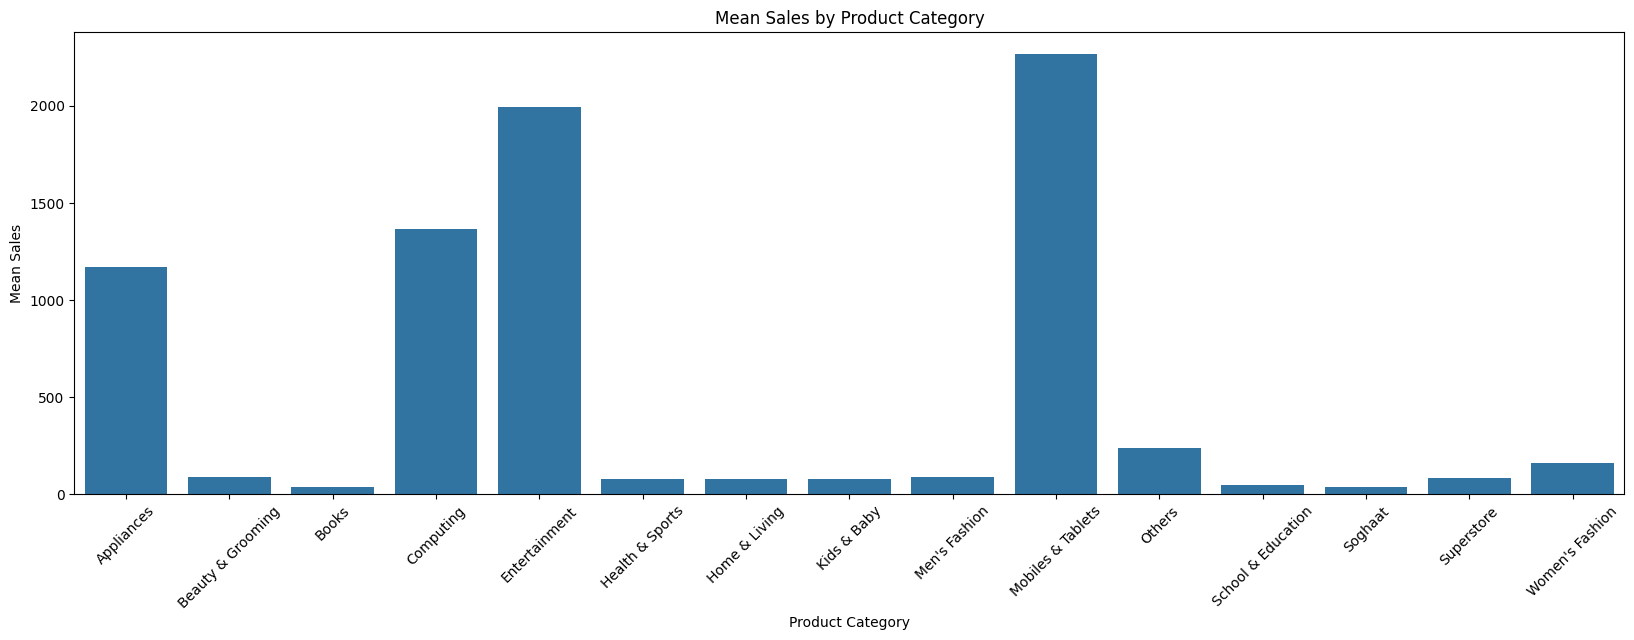

In [11]:
category_mean_sales = sales_data.groupby('category')['price'].mean().reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(x='category', y='price', data=category_mean_sales)
plt.title('Mean Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Mean Sales')
plt.xticks(rotation=45)
plt.show()

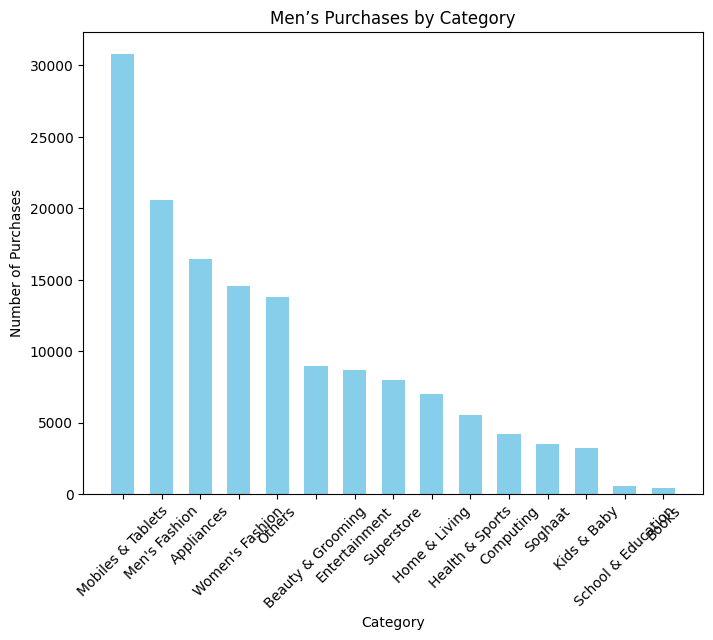

In [12]:
men_purchases = sales_data[sales_data['Gender'] == 'M']

men_category_counts = men_purchases['category'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(men_category_counts.index, men_category_counts.values, color='skyblue', width=0.6)

plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.title('Men’s Purchases by Category')
plt.xticks(rotation=45, ha='center')  # Rotate and align labels

plt.show()

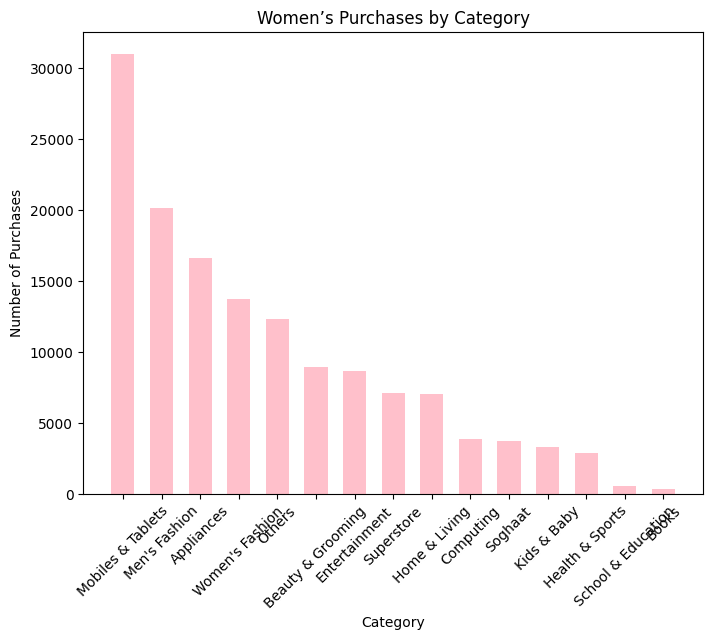

In [13]:
women_purchases = sales_data[sales_data['Gender'] == 'F']

women_category_counts = women_purchases['category'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(women_category_counts.index, women_category_counts.values, color='pink', width=0.6)

plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.title('Women’s Purchases by Category')
plt.xticks(rotation=45, ha='center')  # Rotate and align labels

plt.show()

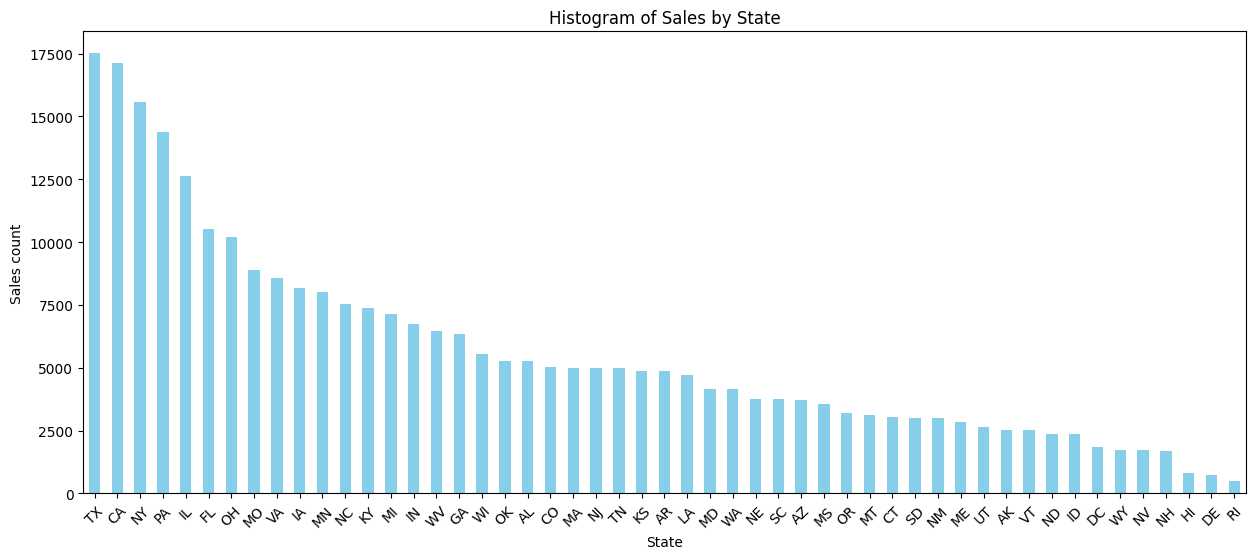

In [14]:
state_count = sales_data['State'].value_counts()
state_count.plot(kind='bar', color='skyblue', figsize=(15, 6))

plt.xlabel('State')
plt.ylabel('Sales count')
plt.title('Histogram of Sales by State')
plt.xticks(ticks=range(len(state_count.index)), labels=state_count.index, rotation=45, ha='center')
plt.show()

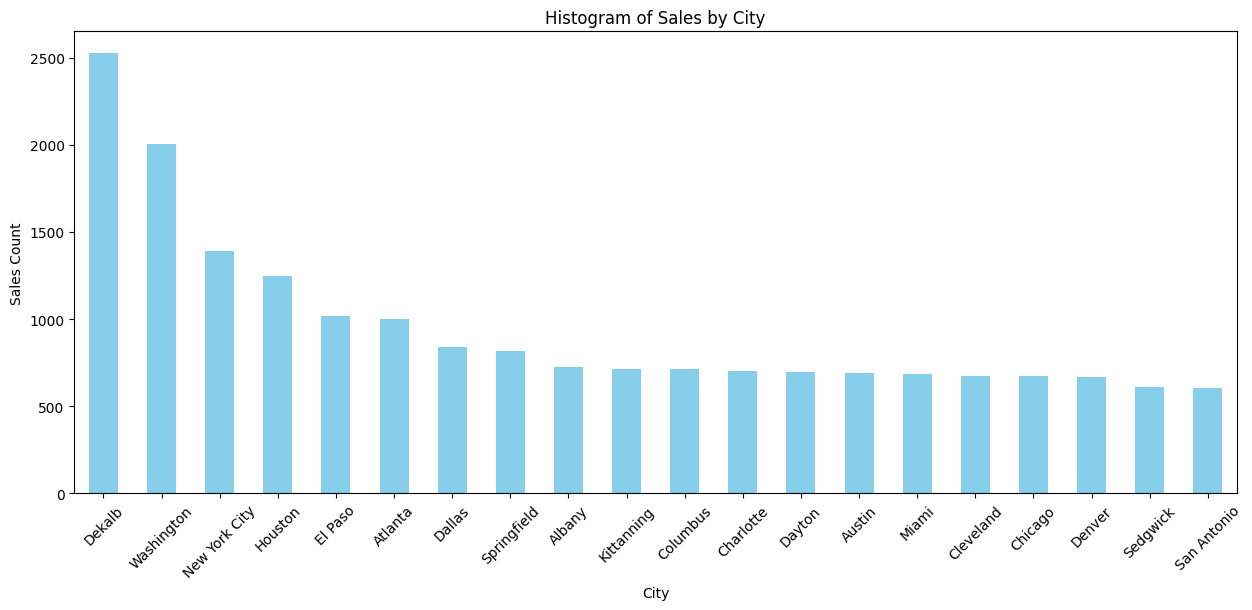

In [17]:
city_count = sales_data['City'].value_counts()
city_count = city_count.sort_values(ascending=False).head(20)

city_count.plot(kind='bar', color='skyblue', figsize=(15, 6))

plt.xlabel('City')
plt.ylabel('Sales Count')
plt.title('Histogram of Sales by City')
plt.xticks(ticks=range(len(city_count.index)), labels=city_count.index, rotation=45, ha='center')
plt.show()